In [1]:
# --- Import Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Display settings
pd.set_option('display.max_columns', None)

In [3]:

# --- Load Cleaned Data (from Notebook 01 output) ---
df = pd.read_excel(r"C:\Users\SUSHIL KUMAR\Desktop\retailsales_analysis\data\Online Retail.xlsx")

In [4]:

# Cleaning steps again (if Notebook 02 runs independently)
df = df.dropna(subset=['CustomerID'])
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype(int)
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


In [5]:

# --- Basic KPIs ---
print("Total Transactions:", len(df))
print("Total Unique Customers:", df['CustomerID'].nunique())
print("Total Unique Products:", df['StockCode'].nunique())
print("Total Revenue:", round(df['TotalPrice'].sum(), 2))



Total Transactions: 397884
Total Unique Customers: 4338
Total Unique Products: 3665
Total Revenue: 8911407.9


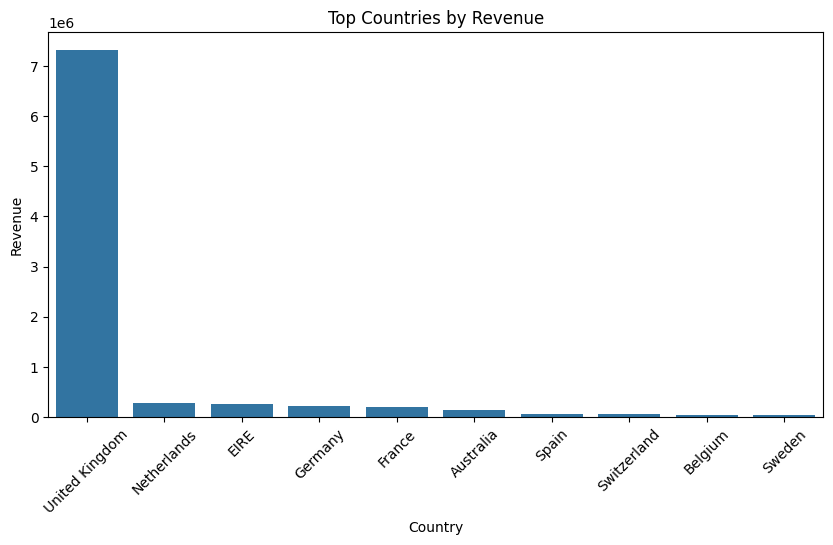

In [6]:
# --- Top 10 Countries by Revenue ---
country_revenue = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=country_revenue.index, y=country_revenue.values)
plt.xticks(rotation=45)
plt.title("Top Countries by Revenue")
plt.ylabel("Revenue")
plt.show()



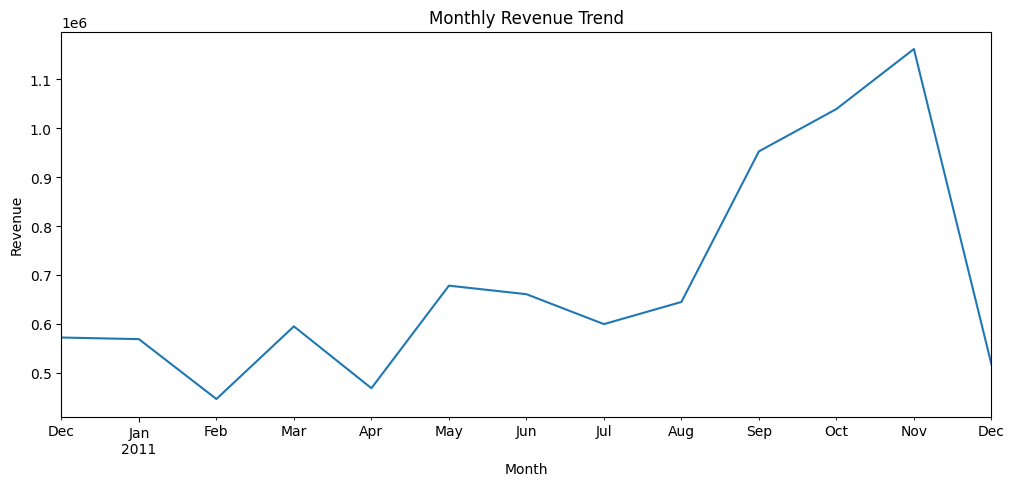

In [7]:
# --- Monthly Sales Trend ---
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['TotalPrice'].sum()

plt.figure(figsize=(12,5))
monthly_sales.plot(kind='line')
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.show()



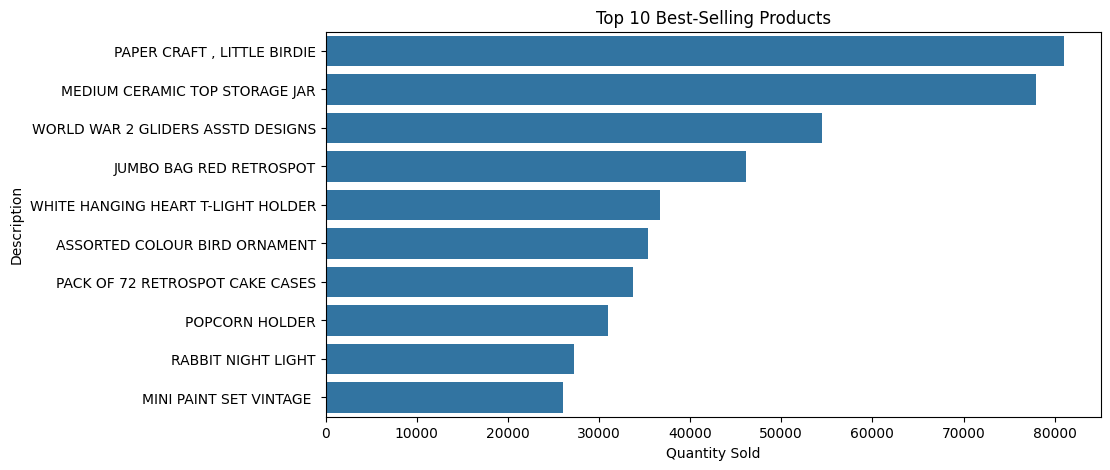

In [8]:
# --- Top Selling Products ---
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(y=top_products.index, x=top_products.values)
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Quantity Sold")
plt.show()



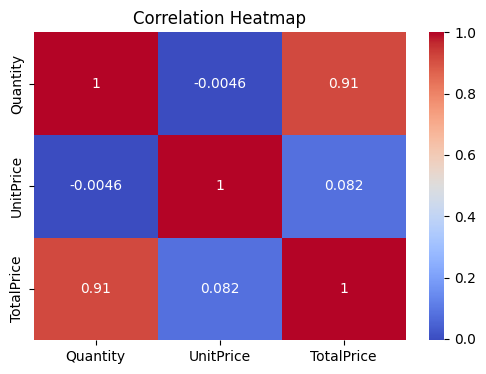

In [9]:
# --- Heatmap (Correlation) ---
plt.figure(figsize=(6,4))
sns.heatmap(df[['Quantity', 'UnitPrice', 'TotalPrice']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



In [10]:
# --- Interactive Revenue Map ---
country_map = df.groupby('Country')['TotalPrice'].sum().reset_index()
fig = px.choropleth(country_map, locations="Country", locationmode="country names",
                    color="TotalPrice", title="Global Revenue Distribution")
fig.show()


C:\Users\SUSHIL KUMAR\AppData\Local\Temp\ipykernel_23840\2964099908.py:3: DeprecationWarning: The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.
  fig = px.choropleth(country_map, locations="Country", locationmode="country names",


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed